In [23]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import time

## Open complete csv file for 2021 SPY data

In [33]:
orig_df = pd.read_csv("csv_data/SPY_2021.csv")
#orig_df

In [71]:
#plt.plot(orig_df['Adj Close'])

In [67]:
spy_df = pd.read_csv("csv_data/SPY_2021.csv", index_col='Date',
                    parse_dates=True, usecols=['Date','Adj Close'],
                    na_values = ['nan'])

spy_df.isnull().any()
#spy_df

Adj Close    False
dtype: bool

## Create a dataframe for just SPY 'Adj Close' for 2021 - add rolling mean and shifted price

In [68]:
shifted_df = pd.DataFrame(index=spy_df.index)
shifted_df['SPY'] = spy_df['Adj Close']
shifted_df['Y'] = spy_df['Adj Close']
shifted_df['Y'] = shifted_df['Y'].shift(periods=3, fill_value=0)
#shifted_df

In [69]:
shifted_df['rm_5'] = shifted_df['SPY'].rolling(5).mean()
shifted_df = shifted_df.dropna()
#shifted_df

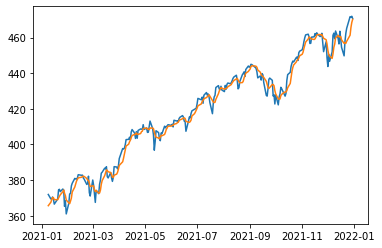

In [70]:
plt.plot(shifted_df['SPY'])
plt.plot(shifted_df['rm_5'])

## Take only date for Q1

In [83]:
q1_dates = pd.date_range('2021-01-01','2021-03-31')
#q1_dates

In [84]:
q1_df = pd.DataFrame(index = q1_dates)
q1_df = q1_df.join(shifted_df, how='left')
q1_df = q1_df.dropna()
#q1_df

## Do some ML

# Learning shift

In [20]:
mydf = pd.DataFrame({"Col1":[1,2,3,4,5],
                    "Col2":[2,4,6,8,10],
                    "Col3":[3,6,9,12,15]},
                   index = pd.date_range("2020-01-01","2020-01-05"))
mydf

,Col1,Col2,Col3
2020-01-01,1,2,3
2020-01-02,2,4,6
2020-01-03,3,6,9
2020-01-04,4,8,12
2020-01-05,5,10,15


In [21]:
mydf['Col3'] = mydf['Col3'].shift(periods=3, fill_value=0)
mydf

,Col1,Col2,Col3
2020-01-01,1,2,0
2020-01-02,2,4,0
2020-01-03,3,6,0
2020-01-04,4,8,3
2020-01-05,5,10,6
